In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/RnD/am_analysis/")
import am_analysis as ama
import skimage.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import glob
from IPython.display import Audio
from tqdm import tqdm
from IPython.display import Audio
import sys
import pandas as pd

In [ ]:
# FUNCTIONS FOR MODULATION SPECTROGRAM
def modSpec(x, fs,win_size_sec=0.04):
    # win_size_sec = 0.04  # window length for the STFFT (seconds)
    win_shft_sec = 0.01  # shift between consecutive windows (seconds)

    stft_modulation_spectrogram = ama.strfft_modulation_spectrogram(
        x,
        fs,
        win_size=round(win_size_sec * fs),
        win_shift=round(win_shft_sec * fs))

    return stft_modulation_spectrogram

def specImage(filename,win_size_sec=0.04):
    fs, x = wavfile.read(filename)
    x_name = ['speech']
    x = x / np.max(x)
    # 1s segment to analyze
    # x = x[int(fs*1.6) : int(fs*3.6)]

    X_data = modSpec(x, fs,win_size_sec)

    ama.plot_modulation_spectrogram_data(X_data,
                                         0,
                                         modf_range=np.array([0, 20]),
                                         c_range=np.array([-90, -50]))

    # Get the current figure and convert it to a 3D array
    fig = plt.gcf()
    fig.canvas.draw()
    plot_data_rgba = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close()  # Close the plot to free up resources

    # Remove the alpha channel to get a 3D array
    plot_data_rgb = plot_data_rgba[:, :, :3]

    return plot_data_rgb



In [ ]:

# # Get the spectrogram image
filepath1 = "/content/drive/MyDrive/RnD/EATD/Training/Utterances_D/negative_out_20.wav"
img1 = specImage(filepath1)

filepath2 = "/content/drive/MyDrive/RnD/EATD/Training/Utterances_D/negative_out_22.wav"
img2 = specImage(filepath2)

In [ ]:
def ssimFromAudio(filepath1, filepath2,win_size=11):
    img1 = specImage(filepath1)
    img2 = specImage(filepath2)
    ssim_score = metrics.structural_similarity(img1, img2, win_size=win_size, channel_axis=2)
    return ssim_score

def ssimFromImage(img1, img2,win_size=11):

    ssim_score = metrics.structural_similarity(img1, img2, win_size=win_size, channel_axis=2)
    return ssim_score

def playAudio(path):
    return Audio(path)

In [ ]:
# win_size_sec=0.04
plt.imshow(specImage(filepath1,win_size_sec=0.04).astype(np.int32))
plt.axis('off')
plt.show()

NameError: ignored

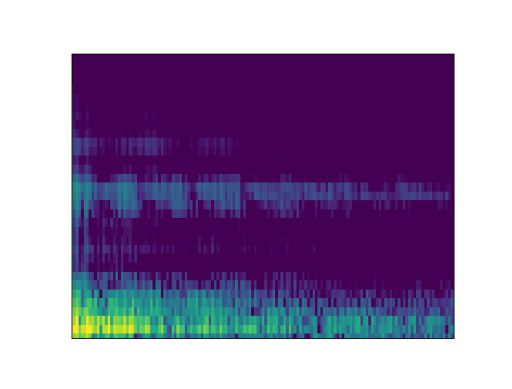

In [ ]:
# win_size_sec=0.02
plt.imshow(specImage(filepath1,win_size_sec=0.4).astype(np.int32))
plt.axis('off')
plt.show()

Data


In [ ]:
# # EATD
# # CODE : 1 if Depressed else 0
EATD = {
    "TRAIN_D": {"src": "/content/drive/MyDrive/RnD/EATD/Training/Utterances_D/", "Storage" : [], "Code" : 1},
    "TRAIN_ND": {"src":  "/content/drive/MyDrive/RnD/EATD/Training/Utterances_ND/", "Storage" :[] ,"Code" : 0},
    "TEST_D": {"src":"/content/drive/MyDrive/RnD/EATD/Test/Test_D/", "Storage": [],"Code" : 1},
    "TEST_ND": {"src": "/content/drive/MyDrive/RnD/EATD/Test/Test_ND/", "Storage": [],"Code" : 0}
}
for key in EATD.keys():
    EATD[key]["Storage"] =  glob.glob(EATD[key]["src"] + "*")




In [ ]:
# EATD_SPEC_TRAIN = []

# column = 'TRAIN_D'
# code_value = EATD[column]['Code']  # Get the code value outside the loop

# for i in tqdm(EATD[column]['Storage']):
#     try:
#         EATD_SPEC_TRAIN.append({"Image": specImage(i), "Code": code_value})
#     except:
#         print(f"Error in {i}")

# column = 'TRAIN_ND'
# code_value = EATD[column]['Code']  # Get the code value outside the loop

# for i in tqdm(EATD[column]['Storage']):
#     try:
#         EATD_SPEC_TRAIN.append({"Image": specImage(i), "Code": code_value})
#     except:
#         print(f"Error in {i}")





# EATD_SPEC_TEST= []

# column = 'TEST_D'
# code_value = EATD[column]['Code']  # Get the code value outside the loop

# for i in tqdm(EATD[column]['Storage']):
#     try:
#         EATD_SPEC_TEST.append({"Image": specImage(i), "Code": code_value})
#     except:
#         print(f"Error in {i}")

# column = 'TEST_ND'
# code_value = EATD[column]['Code']  # Get the code value outside the loop

# for i in tqdm(EATD[column]['Storage']):
#     try:
#         EATD_SPEC_TEST.append({"Image": specImage(i), "Code": code_value})
#     except:
#         print(f"Error in {i}")

def generate_df (EATD,win_size_sec=0.04):
    EATD_SPEC_TRAIN = []

    column = 'TRAIN_D'
    code_value = EATD[column]['Code']  # Get the code value outside the loop

    for i in tqdm(EATD[column]['Storage']):
        try:
            EATD_SPEC_TRAIN.append({"Image": specImage(i,win_size_sec), "Code": code_value})
        except:
            print(f"Error in {i}")

    column = 'TRAIN_ND'
    code_value = EATD[column]['Code']  # Get the code value outside the loop

    for i in tqdm(EATD[column]['Storage']):
        try:
            EATD_SPEC_TRAIN.append({"Image": specImage(i,win_size_sec), "Code": code_value})
        except:
            print(f"Error in {i}")





    EATD_SPEC_TEST= []

    column = 'TEST_D'
    code_value = EATD[column]['Code']  # Get the code value outside the loop

    for i in tqdm(EATD[column]['Storage']):
        try:
            EATD_SPEC_TEST.append({"Image": specImage(i,win_size_sec), "Code": code_value})
        except:
            print(f"Error in {i}")

    column = 'TEST_ND'
    code_value = EATD[column]['Code']  # Get the code value outside the loop

    for i in tqdm(EATD[column]['Storage']):
        try:
            EATD_SPEC_TEST.append({"Image": specImage(i,win_size_sec), "Code": code_value})
        except:
            print(f"Error in {i}")
    return EATD_SPEC_TRAIN,EATD_SPEC_TEST

In [ ]:
# eatd_df_train = pd.DataFrame(EATD_SPEC_TRAIN)
# eatd_df_test = pd.DataFrame(EATD_SPEC_TEST)

eatd_df_train_0_01 ,eatd_df_test_0_01 = generate_df (EATD,win_size_sec=0.01)
eatd_df_train_0_01 = pd.DataFrame(eatd_df_train_0_01)
eatd_df_test_0_01 = pd.DataFrame(eatd_df_test_0_01)

  4%|▍         | 9/201 [00:07<03:08,  1.02it/s]

Error in /content/drive/MyDrive/RnD/EATD/Test/Test_ND/positive_out_79.wav


100%|██████████| 201/201 [03:09<00:00,  1.06it/s]


In [ ]:
import pandas as pd
import pickle

load_path = '/content/drive/MyDrive/RnD/'
save_path = '/content/drive/MyDrive/RnD/'

# Assuming you have already loaded your data into eatd_df_train and eatd_df_test

# Saving dataframes
# with open(save_path + 'eatd_df_train_0_01.pkl', 'wb') as f:
#     pickle.dump(eatd_df_train_0_01, f)

# with open(save_path + 'eatd_df_test_0_01.pkl', 'wb') as f:
#     pickle.dump(eatd_df_test_0_01, f)

In [ ]:
# Loading dataframes
name  = "_0_01"
with open(load_path + 'eatd_df_train'+name+'.pkl', 'rb') as f:
    loaded_eatd_df_train_0_01 = pickle.load(f)

with open(load_path + 'eatd_df_test'+name+'.pkl', 'rb') as f:
    loaded_eatd_df_test_0_01 = pickle.load(f)

In [ ]:
name  = "_0_04"
with open(load_path + 'eatd_df_train'+name+'.pkl', 'rb') as f:
    loaded_eatd_df_train_0_04 = pickle.load(f)

with open(load_path + 'eatd_df_test'+name+'.pkl', 'rb') as f:
    loaded_eatd_df_test_0_04 = pickle.load(f)

In [ ]:
name  = "_0_004"
with open(load_path + 'eatd_df_train'+name+'.pkl', 'rb') as f:
    loaded_eatd_df_train_0_004 = pickle.load(f)

with open(load_path + 'eatd_df_test'+name+'.pkl', 'rb') as f:
    loaded_eatd_df_test_0_004 = pickle.load(f)

In [ ]:
x = loaded_eatd_df_train_0_01.iloc[0]['Image']
y = loaded_eatd_df_train_0_04.iloc[0]['Image']
z = loaded_eatd_df_train_0_004.iloc[0]['Image']


In [ ]:
np.concatenate([x, y, z], axis=0).shape

(1440, 640, 3)

In [ ]:

loaded_eatd_df_train = []
loaded_eatd_df_test = []
for i in range(len(loaded_eatd_df_train_0_01)):
    x = loaded_eatd_df_train_0_01.iloc[i]['Image']
    y = loaded_eatd_df_train_0_04.iloc[i]['Image']
    z = loaded_eatd_df_train_0_004.iloc[i]['Image']
    result = np.concatenate([x, y, z], axis=0)
    loaded_eatd_df_train.append({"Image": result, "Code" : loaded_eatd_df_train_0_01.iloc[i]["Code"]})

for i in range(len(loaded_eatd_df_test_0_01)):
    x = loaded_eatd_df_test_0_01.iloc[i]['Image']
    y = loaded_eatd_df_test_0_04.iloc[i]['Image']
    z = loaded_eatd_df_test_0_004.iloc[i]['Image']
    result = np.concatenate([x, y, z], axis=0)
    loaded_eatd_df_test.append({"Image": result, "Code" : loaded_eatd_df_test_0_01.iloc[i]["Code"]})

loaded_eatd_df_train = pd.DataFrame(loaded_eatd_df_train)
loaded_eatd_df_test = pd.DataFrame(loaded_eatd_df_test)

In [ ]:

loaded_eatd_df_test.iloc[0]["Image"].shape

(1440, 640, 3)

In [ ]:
# SSIM Score Analysis
# Using EATD Train
# D VS ND
# SSIM_EATD_TRAIN_SSIM = []
# for i in range(20):
#     try:
#         SSIM_EATD_TRAIN_SSIM.append(ssimFromImage(loaded_eatd_df_train[loaded_eatd_df_train['Code']==1]['Image'].values[i],loaded_eatd_df_train[loaded_eatd_df_train['Code']==0]['Image'].values[i]))
#     except:
#         print("*")
# plt.hist(SSIM_EATD_TRAIN_SSIM)
# plt.show()

In [ ]:
# SSIM_EATD_TRAIN_SSIM

In [ ]:
# print(f"Mean of SSIM score is {np.mean(SSIM_EATD_TRAIN_SSIM)}")

In [ ]:
# SSIM Score Analysis
# Using EATD TEST
# D VS ND

# SSIM_EATD_TEST_SSIM = []
# for i in tqdm(range(20)):
#     try:
#         SSIM_EATD_TEST_SSIM.append(ssimFromImage(loaded_eatd_df_test[loaded_eatd_df_test['Code']==1]['Image'].values[i],loaded_eatd_df_test[loaded_eatd_df_test['Code']==0]['Image'].values[i]))
#     except:
#         print("*")
# plt.hist(SSIM_EATD_TEST_SSIM)
# plt.show()

In [ ]:
# print(f"Mean SSIM from Test Set is {np.mean(SSIM_EATD_TEST_SSIM)} ")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from tqdm import tqdm

# Define your custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_df, transform=None):
        self.data_df = data_df
        self.transform = transform

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, idx):
        image = self.data_df.iloc[idx]['Image']
        label = self.data_df.iloc[idx]['Code']

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:

# Define the ResNet model
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load train and test data
train_dataset = CustomDataset(data_df=loaded_eatd_df_train, transform=transform)
test_dataset = CustomDataset(data_df=loaded_eatd_df_test, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [ ]:
import time
# Define the model and optimizer
num_classes = 2  # Adjust based on your problem
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNetModel(num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


# Training loop with progress bar
num_epochs = 20
start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Create a tqdm progress bar for the training batches
    train_progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

    for batch_inputs, batch_labels in train_progress:
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

        optimizer.zero_grad()
        batch_outputs = model(batch_inputs)
        loss = criterion(batch_outputs, batch_labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Update the tqdm progress bar description with current loss
        train_progress.set_postfix({"Train Loss": train_loss / len(train_progress)})

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss/len(train_loader):.4f}")
end_time = time.time()
print("Training complete!")
print("Time taken : ",end_time-start_time ," s")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20 - Train Loss: 0.7041


Epoch 2/20 - Train Loss: 0.5439


Epoch 3/20 - Train Loss: 0.5465


Epoch 4/20 - Train Loss: 0.4928


Epoch 5/20 - Train Loss: 0.4690


Epoch 6/20 - Train Loss: 0.4327


Epoch 7/20 - Train Loss: 0.5279


Epoch 8/20 - Train Loss: 0.4237


Epoch 9/20 - Train Loss: 0.3553


Epoch 10/20 - Train Loss: 0.4089


Epoch 11/20 - Train Loss: 0.3312


Epoch 12/20 - Train Loss: 0.2742


Epoch 13/20 - Train Loss: 0.2416


Epoch 14/20 - Train Loss: 0.3594


Epoch 15/20 - Train Loss: 0.2772


Epoch 16/20 - Train Loss: 0.2280


Epoch 17/20 - Train Loss: 0.1383


Epoch 18/20 - Train Loss: 0.0740


Epoch 19/20 - Train Loss: 0.0931


Epoch 20/20 - Train Loss: 0.0756
Training complete!
Time taken :  104.5535876750946  s


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plotConfusionMatrix(batch_labels,predicted_labels):

    # Move the tensors to CPU memory
    all_batch_labels_cpu = batch_labels
    all_predicted_labels_cpu = predicted_labels

    # Create the confusion matrix
    conf_matrix = confusion_matrix(all_batch_labels_cpu, all_predicted_labels_cpu)

    # Plot the confusion matrix as a heatmap with a smaller figsize
    plt.figure(figsize=(4, 4))  # Adjust the dimensions as needed
    sns.set(font_scale=1.0)  # Adjust font scale as needed
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", annot_kws={"size": 10}, cbar=False)

    # Adjust tick positions and labels
    tick_positions = [0.5, 1.5]  # Center of each cell
    plt.gca().set_xticks(tick_positions)
    plt.gca().set_yticks(tick_positions)
    plt.gca().set_xticklabels(["ND", "D"])
    plt.gca().set_yticklabels(["ND", "D"])

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

Testing: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]


Test Accuracy: 81.5451 % 



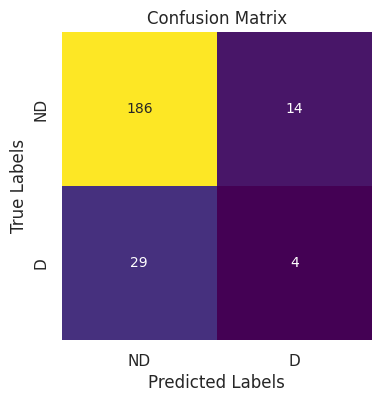

In [ ]:
# Testing loop for test data
model.eval()
correct_predictions = 0
total_samples = 0
all_batch_labels = []
all_predicted_labels = []

for batch_inputs, batch_labels in tqdm(test_loader, desc="Testing"):
    batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

    with torch.no_grad():
        batch_outputs = model(batch_inputs)
        predicted_labels = torch.argmax(batch_outputs, dim=1)

    correct_predictions += (predicted_labels == batch_labels).sum().item()
    total_samples += batch_labels.size(0)

    all_batch_labels.extend(batch_labels.cpu().numpy())
    all_predicted_labels.extend(predicted_labels.cpu().numpy())

test_accuracy = correct_predictions / total_samples
print(f"Test Accuracy: {test_accuracy*100:.4f} % \n")

# Convert the lists to numpy arrays
all_batch_labels = np.array(all_batch_labels)
all_predicted_labels = np.array(all_predicted_labels)
plotConfusionMatrix(all_batch_labels, all_predicted_labels)

Training: 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

Train Accuracy: 97.1888 %


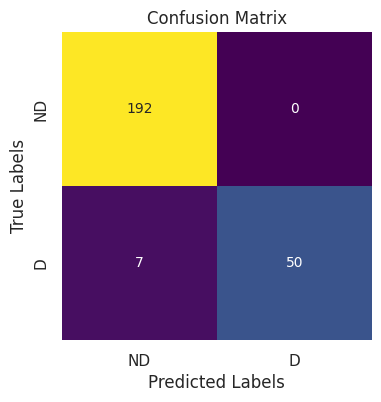

In [ ]:
# Testing loop for train data
model.eval()
correct_predictions = 0
total_samples = 0
all_batch_labels = []
all_predicted_labels = []

for batch_inputs, batch_labels in tqdm(train_loader, desc="Training"):
    batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

    with torch.no_grad():
        batch_outputs = model(batch_inputs)
        predicted_labels = torch.argmax(batch_outputs, dim=1)

    correct_predictions += (predicted_labels == batch_labels).sum().item()
    total_samples += batch_labels.size(0)

    all_batch_labels.extend(batch_labels.cpu().numpy())
    all_predicted_labels.extend(predicted_labels.cpu().numpy())

train_accuracy = correct_predictions / total_samples
print(f"Train Accuracy: {train_accuracy*100:.4f} %")


# Convert the lists to numpy arrays
all_batch_labels = np.array(all_batch_labels)
all_predicted_labels = np.array(all_predicted_labels)

plotConfusionMatrix(all_batch_labels, all_predicted_labels)


**VGG 16**

In [ ]:
# import os
# from keras.models import Model
# from keras.optimizers import Adam
# from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.layers import Dense, Dropout, Flatten
# from pathlib import Path
# import numpy as np

In [ ]:
# def create_VGG_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
#     """
#     Compiles a model integrated with VGG16 pretrained layers

#     input_shape: tuple - the shape of input images (width, height, channels)
#     n_classes: int - number of classes for the output layer
#     optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
#     fine_tune: int - The number of pre-trained layers to unfreeze.
#                 If set to 0, all pretrained layers will freeze during training
#     """

#     # Pretrained convolutional layers are loaded using the Imagenet weights.
#     # Include_top is set to False, in order to exclude the model's fully-connected layers.
#     conv_base = VGG16(include_top=False,
#                      weights='imagenet',
#                      input_shape=input_shape)

#     # Defines how many layers to freeze during training.
#     # Layers in the convolutional base are switched from trainable to non-trainable
#     # depending on the size of the fine-tuning parameter.
#     if fine_tune > 0:
#         for layer in conv_base.layers[:-fine_tune]:
#             layer.trainable = False
#     else:
#         for layer in conv_base.layers:
#             layer.trainable = False

#     # Create a new 'top' of the model (i.e. fully-connected layers).
#     # This is 'bootstrapping' a new top_model onto the pretrained layers.
#     top_model = conv_base.output
#     top_model = Flatten(name="flatten")(top_model)
#     top_model = Dense(4096, activation='relu')(top_model)
#     top_model = Dense(1072, activation='relu')(top_model)
#     top_model = Dropout(0.2)(top_model)
#     output_layer = Dense(1, activation='sigmoid')(top_model)

#     # Group the convolutional base and new fully-connected layers into a Model object.
#     model = Model(inputs=conv_base.input, outputs=output_layer)

#     # Compiles the model for training.
#     model.compile(optimizer=optimizer,
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model

In [ ]:
# from sklearn.model_selection import train_test_split

# # Assuming loaded_eatd_df_train contains your data and labels
# data = loaded_eatd_df_train.drop(columns=['Code'])  # Extract features
# labels = loaded_eatd_df_train['Code']  # Extract labels

# # Split the dataset into training and validation sets
# train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)



In [ ]:
# # VGG_model =  create_VGG_model(input_shape = img1.shape, n_classes =2)
# input_shape = img1.shape
# optim_1 = Adam(learning_rate=0.001)
# n_classes=2

# n_steps = len(train_data) // 32  #batch size
# n_val_steps =  len(val_data) // 32
# n_epochs = 50
# n_epochs = 2

# # First we'll train the model without Fine-tuning
# vgg_model = create_VGG_model(input_shape, n_classes, optim_1, fine_tune=0)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# !pip install livelossplot


In [ ]:
# from livelossplot.inputs.keras import PlotLossesCallback

# plot_loss_1 = PlotLossesCallback()

# # ModelCheckpoint callback - save best weights
# tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
#                                   save_best_only=True,
#                                   verbose=1)

# # EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',
#                            patience=10,
#                            restore_best_weights=True,
#                            mode='min')

In [ ]:
# %%time


# # Convert DataFrame columns to numpy arrays
# train_data_array = train_data.values
# val_data_array = val_data.values

# # Preprocess the data
# train_data_preprocessed = []
# val_data_preprocessed = []
# for i in train_data_array:
#     train_data_preprocessed.append(  preprocess_input(i[0])  )

# for i in val_data_array:
#     val_data_preprocessed.append(  preprocess_input(i[0])  )




CPU times: user 477 ms, sys: 410 ms, total: 887 ms
Wall time: 1.69 s


In [ ]:
# # Compile the model with 'binary_crossentropy' loss
# vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# # Fit the model
# train_labels_reshaped = np.array(train_labels).reshape((-1, 1))
# val_labels_reshaped = np.array(val_labels).reshape((-1, 1))

# vgg_history = vgg_model.fit(
#     x=np.array(train_data_preprocessed),
#     y=train_labels_reshaped,  # Use the reshaped labels
#     batch_size=1,
#     epochs=n_epochs,
#     validation_data=(np.array(val_data_preprocessed), val_labels_reshaped),  # Use the reshaped labels here
#     steps_per_epoch=n_steps,
#     validation_steps=n_val_steps,
#     callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
#     verbose=1
# )

Epoch 1/2


ResourceExhaustedError: ignored